In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

file_to_load = "Data/mouse_drug_data.csv"
file_to_load2 = "Data/clinicaltrial_data.csv"

mouse_df= pd.read_csv(file_to_load)
clinical_df = pd.read_csv(file_to_load2)

# Combine the data into a single dataset

combined_df = pd.merge(mouse_df,clinical_df, on= ['Mouse ID'])


# Display the data table for preview

combined_df



,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

tumor_df = combined_df[['Drug', 'Timepoint',"Tumor Volume (mm3)" ]]
tumor_df.groupby(['Drug','Timepoint'],as_index=False).mean()

# Convert to DataFrame

average_mean = tumor_df.groupby(['Drug','Timepoint'],as_index=False).mean()

# Preview DataFrame

average_mean.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

tumor_df.groupby(['Drug','Timepoint'],as_index=True).sem()
# Convert to DataFrame

error = tumor_df.groupby(['Drug','Timepoint'],as_index=True).sem()
# Preview DataFrame
standard_error = error.reset_index()
standard_error.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
standard_error.pivot(index='Timepoint',columns='Drug')["Tumor Volume (mm3)"]

# Preview that Reformatting worked
error_reformat = standard_error.pivot(index='Timepoint',columns='Drug')["Tumor Volume (mm3)"]
error_reformat.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [54]:
mean_reformat = average_mean.pivot(index='Timepoint',columns='Drug')["Tumor Volume (mm3)"]
mean_reformat

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [6]:
mean_reformat.index

Int64Index([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], dtype='int64', name='Timepoint')

In [7]:
mean_reformat['Capomulin']

Timepoint
0     45.000000
5     44.266086
10    43.084291
15    42.064317
20    40.716325
25    39.939528
30    38.769339
35    37.816839
40    36.958001
45    36.236114
Name: Capomulin, dtype: float64

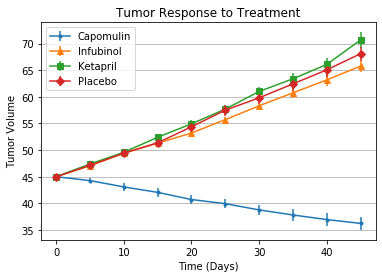

In [47]:
# Generate the Plot (with Error Bars)
plt.errorbar(mean_reformat.index, mean_reformat['Capomulin'],yerr = error_reformat['Capomulin'],marker=".")
plt.errorbar(mean_reformat.index, mean_reformat['Infubinol'],yerr = error_reformat['Infubinol'],marker="^")
plt.errorbar(mean_reformat.index, mean_reformat['Ketapril'],yerr = error_reformat['Ketapril'],marker="s")
plt.errorbar(mean_reformat.index, mean_reformat['Placebo'],yerr = error_reformat['Placebo'],marker="D")
plt.title('Tumor Response to Treatment')
plt.xlabel("Time (Days)")
plt.ylabel('Tumor Volume')
plt.legend(['Capomulin','Infubinol','Ketapril','Placebo'])
plt.grid(axis='y')
# Save the Figure

plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [19]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

met_df = combined_df[['Drug', 'Timepoint',"Metastatic Sites"]]
met_df.groupby(['Drug','Timepoint'],as_index=False).mean()

# Convert to DataFrame

met_mean = met_df.groupby(['Drug','Timepoint'],as_index=False).mean()
# Preview DataFrame
met_mean.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [23]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

met_df.groupby(['Drug','Timepoint'],as_index=True).sem()
# Convert to DataFrame
met_error = met_df.groupby(['Drug','Timepoint'],as_index=True).sem()
# Preview DataFrame
standard_met_error = met_error.reset_index()
standard_met_error.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [24]:
# Minor Data Munging to Re-Format the Data Frames
standard_met_error.pivot(index='Timepoint',columns='Drug')["Metastatic Sites"]

# Preview that Reformatting worked
met_error_reformat = standard_met_error.pivot(index='Timepoint',columns='Drug')["Metastatic Sites"]
met_error_reformat.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


In [27]:
met_mean_reformat.index

Int64Index([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], dtype='int64', name='Timepoint')

In [25]:
met_mean_reformat = met_mean.pivot(index='Timepoint',columns='Drug')["Metastatic Sites"]
met_mean_reformat.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [28]:
met_mean_reformat['Capomulin']

Timepoint
0     0.000000
5     0.160000
10    0.320000
15    0.375000
20    0.652174
25    0.818182
30    1.090909
35    1.181818
40    1.380952
45    1.476190
Name: Capomulin, dtype: float64

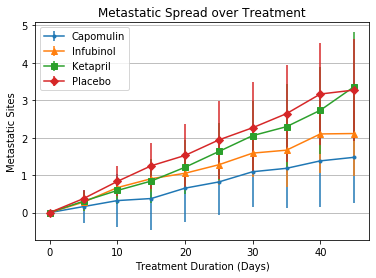

In [51]:
# Generate the Plot (with Error Bars)

plt.errorbar(met_mean_reformat.index, met_mean_reformat['Capomulin'],yerr = error_reformat['Capomulin'],marker=".")
plt.errorbar(met_mean_reformat.index, met_mean_reformat['Infubinol'],yerr = error_reformat['Infubinol'],marker="^")
plt.errorbar(met_mean_reformat.index, met_mean_reformat['Ketapril'],yerr = error_reformat['Ketapril'],marker="s")
plt.errorbar(met_mean_reformat.index, met_mean_reformat['Placebo'],yerr = error_reformat['Placebo'],marker="D")
plt.title('Metastatic Spread over Treatment')
plt.xlabel("Treatment Duration (Days)")
plt.ylabel('Metastatic Sites')
plt.legend(['Capomulin','Infubinol','Ketapril','Placebo'])
plt.grid(axis='y')
# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [31]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

mouse_df = combined_df[['Drug', 'Timepoint',"Mouse ID" ]]
mouse_df.groupby(['Drug','Timepoint'],as_index=False).count()
# Convert to DataFrame
mouse_count = mouse_df.groupby(['Drug','Timepoint'],as_index=False).count()
# Preview DataFrame
mouse_count.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [36]:
# Minor Data Munging to Re-Format the Data Frames

mouse_count_reformat = mouse_count.pivot(index='Timepoint',columns='Drug')["Mouse ID"]

# Preview the Data Frame
mouse_count_reformat

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


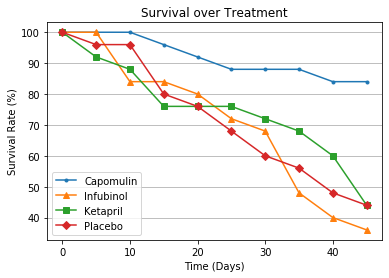

In [53]:
# Generate the Plot (Accounting for percentages
plt.plot(mouse_count_reformat['Capomulin']/25*100,marker=".")         
plt.plot(mouse_count_reformat['Infubinol']/25*100,marker="^")
plt.plot(mouse_count_reformat['Ketapril']/25*100,marker="s")
plt.plot(mouse_count_reformat['Placebo']/25*100,marker="D")
plt.title('Survival over Treatment')
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.legend(['Capomulin','Infubinol','Ketapril','Placebo'])
plt.grid(axis='y')
# Show the Figure
plt.show()

## Summary Bar Graph

In [70]:
# Calculate the percent changes for each drug

changes = round(mean_reformat.pct_change()*1000,2)

# Display the data to confirm
percentage_change = changes.iloc[-1]
percentage_change

Drug
Capomulin   -19.53
Ceftamin     43.35
Infubinol    41.05
Ketapril     69.54
Naftisol     55.86
Placebo      46.60
Propriva     50.96
Ramicane    -44.25
Stelasyn     47.16
Zoniferol    48.38
Name: 45, dtype: float64

In [72]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

TypeError: bar() missing 1 required positional argument: 'height'

![Metastatic Spread During Treatment](../Images/change.png)